## Problem statement

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Project\Third-Phase-Practice-Projects\BANK MARKETING\dataset5-main\termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


#### Columns

In [3]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

### Labels
- ID: Unique client ID
- age: Age of the client
- job: Type of job
- marital: Marital status of the client
- education: Education level
- default: Credit in default.
- housing: Housing loan
- balance: customer ac balance
- loan: Personal loan
- contact: Type of communication
- month: Contact month
- day: Day of Month of contact
- duration: Contact duration
- campaign: number of contacts performed during this campaign to the client
- pdays: number of days that passed by after the client was last contacted
- previous: number of contacts performed before this campaign
- poutcome: outcome of the previous marketing campaign
### Target:
- Subscribed (target): has the client subscribed a term deposit? (YES/NO)


#### Analising basic metrics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
df.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

- From above analysis it seems that there are no null values

In [6]:
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [7]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- there is right skeweness and outliers present in balance
- skeweness and outliers are also present in duration and campaign columns
- outliers are also present in pdays and previous columns

### Univariate analysis

In [8]:
df['ID'].nunique()

31647

- All values are unique

In [9]:
df['age'].nunique()

76

In [10]:
df['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

There are 12 different jobs available

In [11]:
df['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [12]:
df['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [13]:
df['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [14]:
df['balance'].nunique()

6326

In [15]:
df['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [16]:
df['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

In [17]:
df['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [18]:
df['day'].nunique()

31

In [19]:
df['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

In [20]:
df['duration'].nunique()

1454

In [21]:
df['campaign'].nunique()

45

In [22]:
df['pdays'].nunique()

509

In [23]:
df['previous'].nunique()

38

In [24]:
df['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [25]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

### Bivariate Analysis

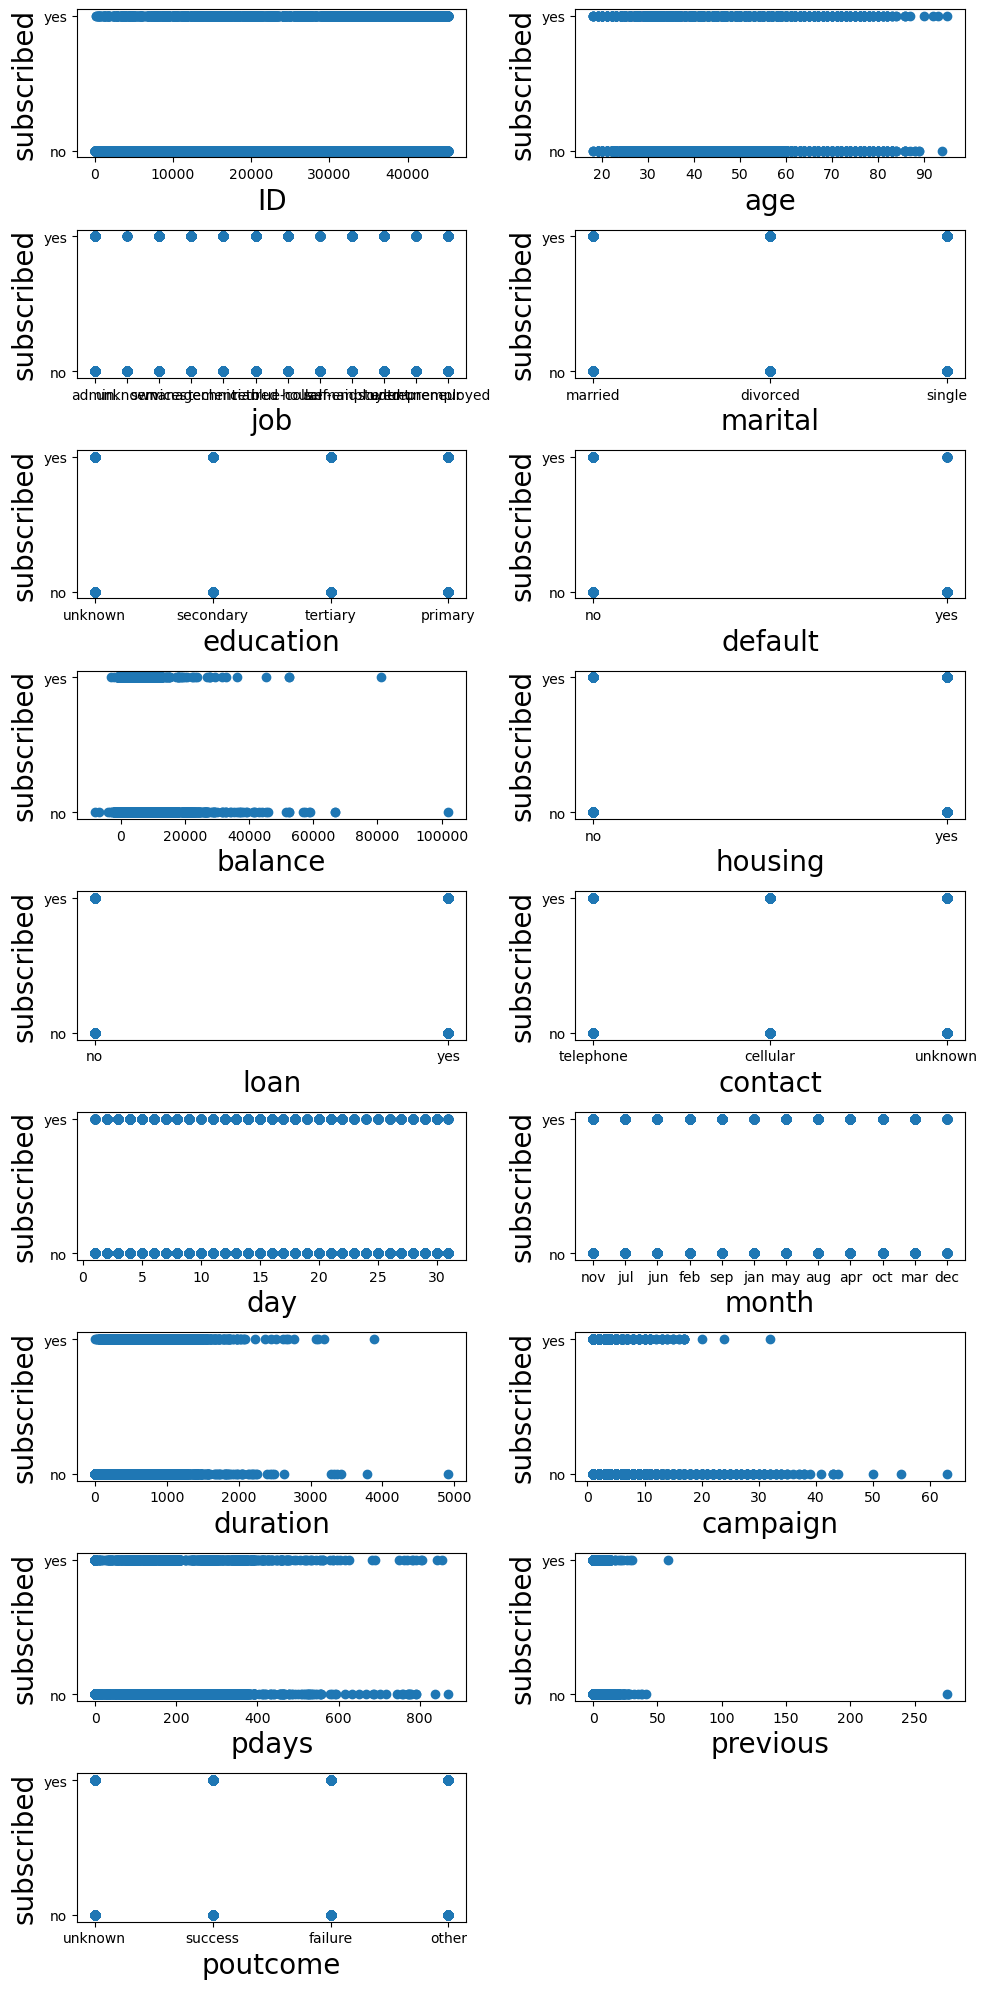

In [26]:
plt.figure(figsize=(10,20))
pn = 1
for column in df.drop(columns='subscribed'):
    ax=plt.subplot(9,2,pn)
    plt.scatter(df[column],df['subscribed'])
    plt.xlabel(column,fontsize = 20)
    plt.ylabel('subscribed',fontsize = 20)
    pn +=1
    
plt.tight_layout()  

- We can observe that alldata is equally distributed and no relation can be oberved from this

In [27]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

# Preprocessing

### Encoading Data

In [28]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [29]:
# Label encoading
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
labn = LabelEncoder()

In [30]:
for column in df.columns:
    # Check if the column is of object type (categorical)
    if df[column].dtype == 'object':
        # Fit label encoder and transform the column
        df[column] = labn.fit_transform(df[column])
        print(labn.classes_)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single']
['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['cellular' 'telephone' 'unknown']
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['failure' 'other' 'success' 'unknown']
['no' 'yes']


In [31]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


### Outlier Treatment

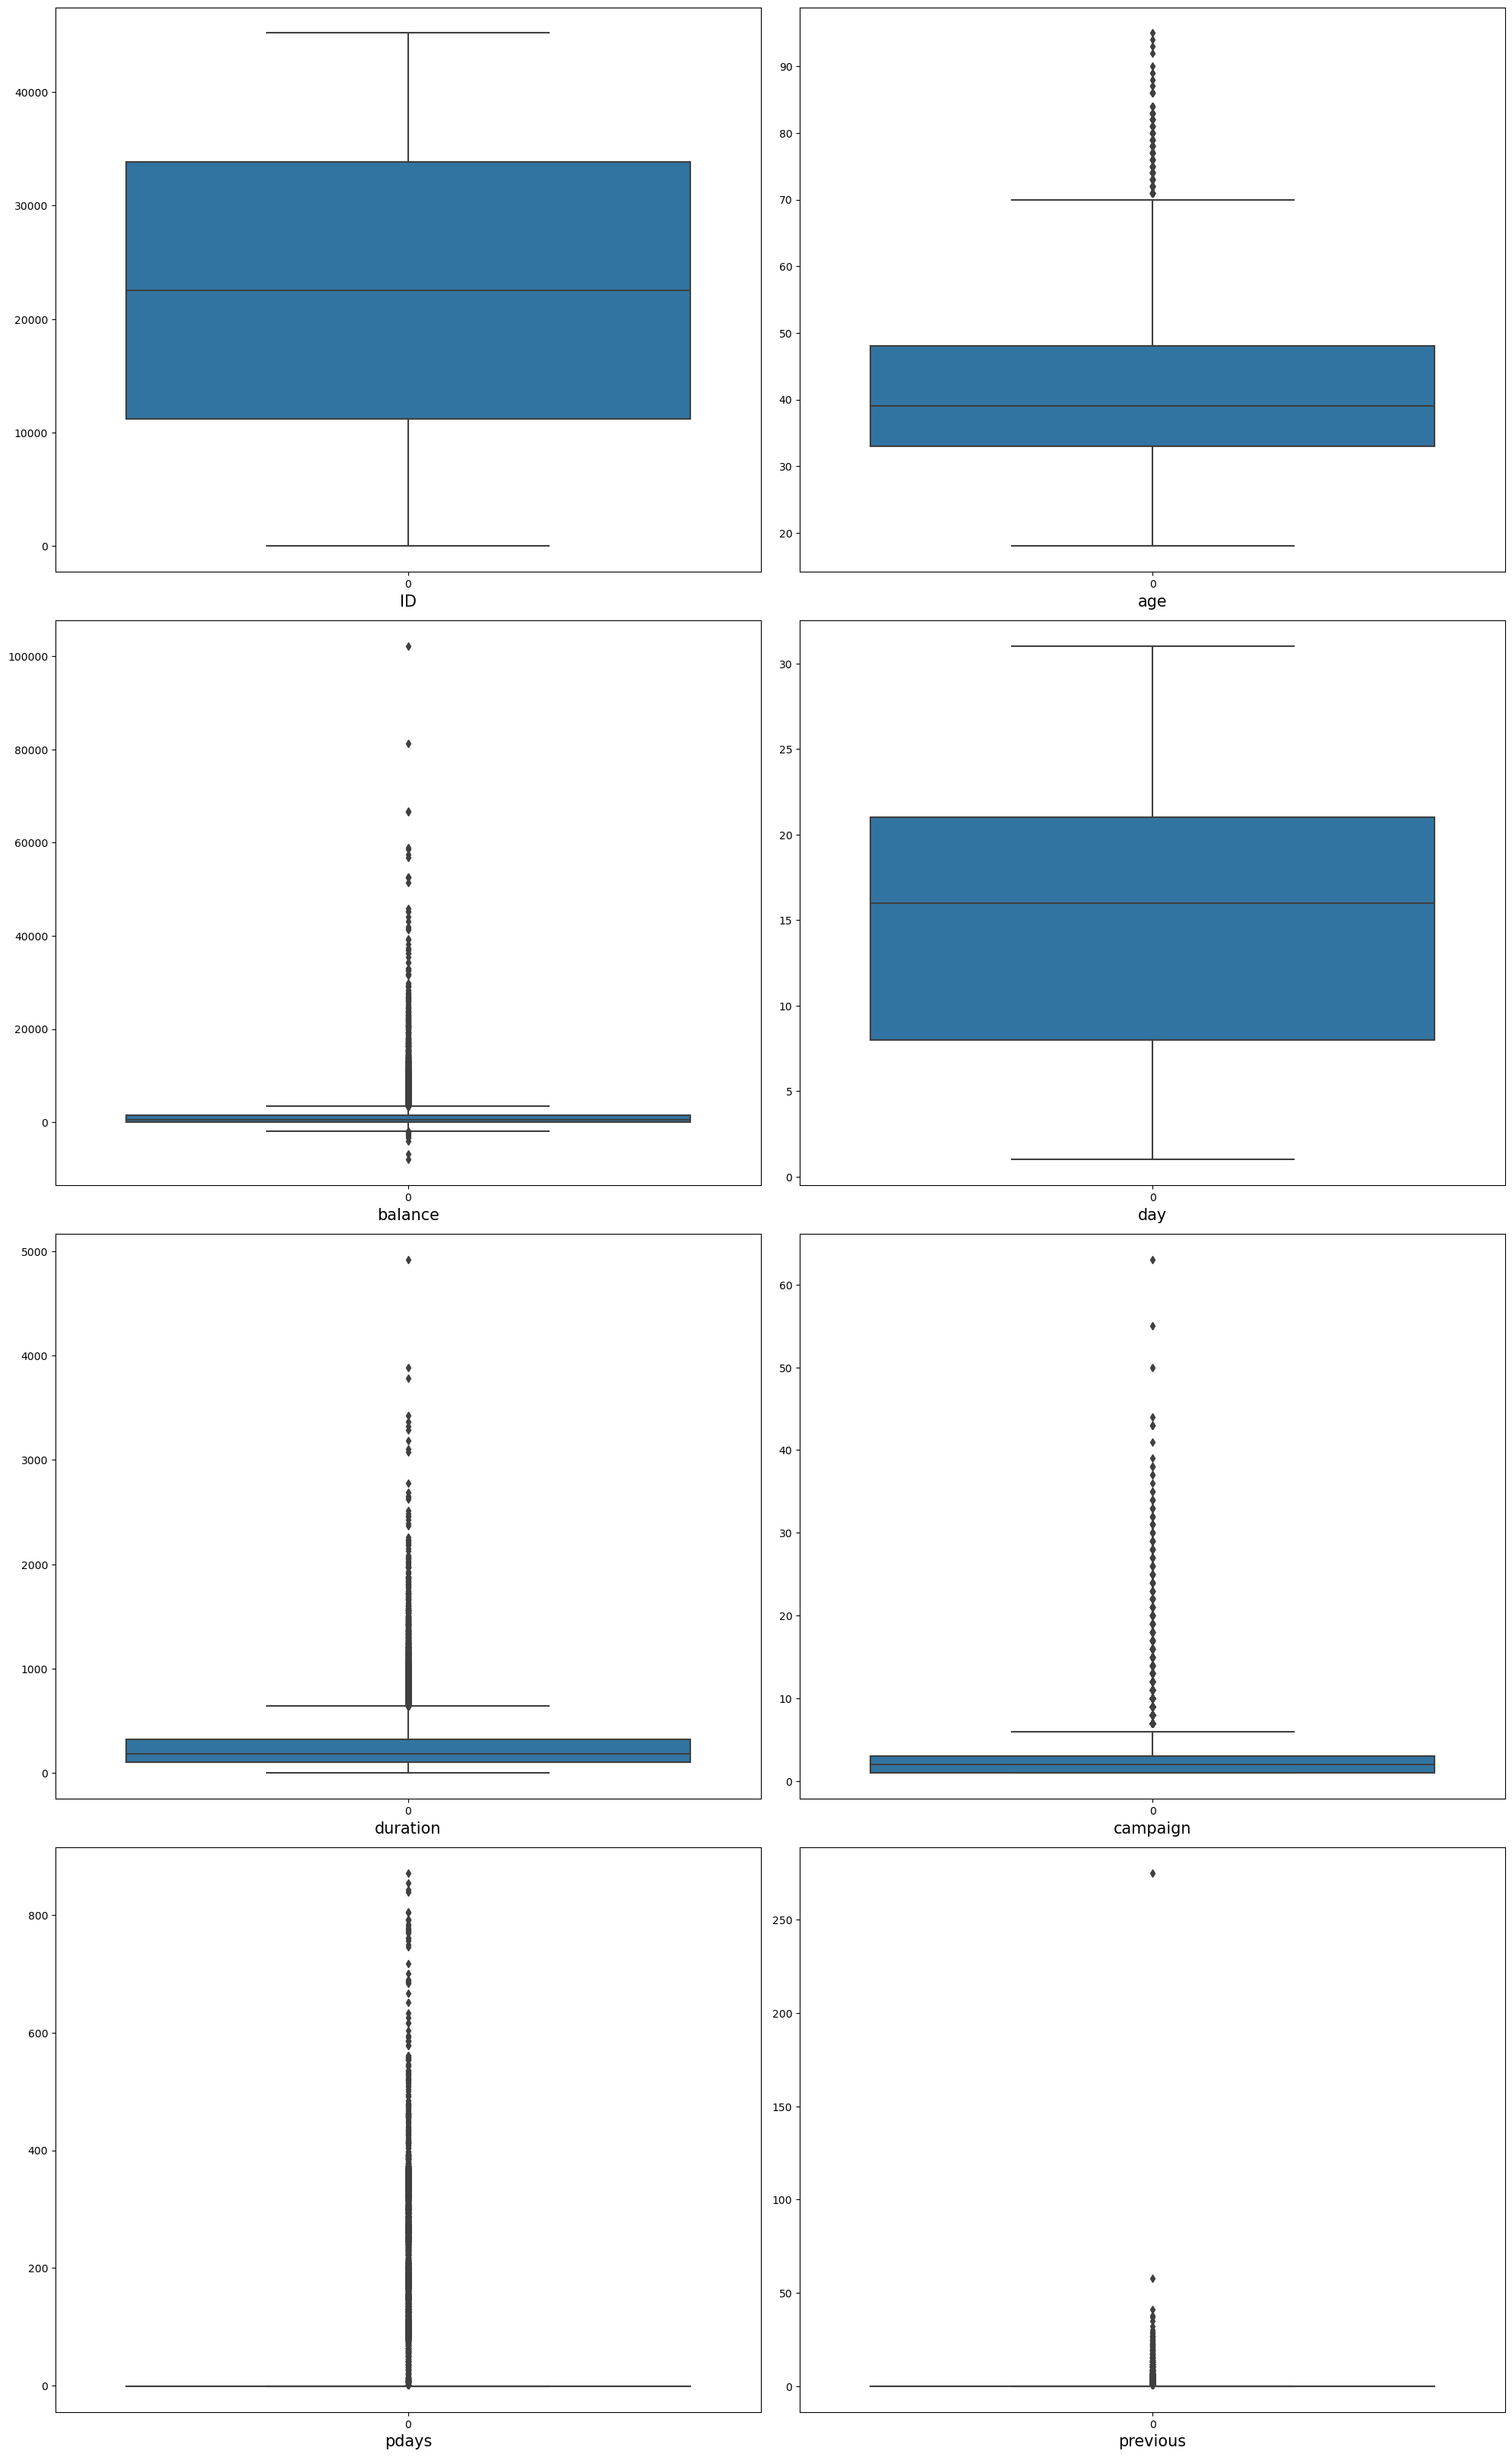

In [32]:
plt.figure(figsize=(20,40))
pn=1
for i in numeric_columns:
    
    
    sns.boxplot(df[i],ax=plt.subplot(5,2,pn))
    plt.xlabel(i,fontsize = 15)
    pn += 1
    
plt.tight_layout()  

- here are Many outliers which are needed to be removed 

In [33]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df[numeric_columns]))
z[z>3].count()

ID             0
age          271
balance      525
day            0
duration     669
campaign     604
pdays       1224
previous     403
dtype: int64

In [34]:
df[numeric_columns] = df[numeric_columns][z<3]
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56.0,0,1,3,0,1933.0,0,0,1,19,9,44.0,2.0,-1.0,0.0,3,0
1,40576,31.0,11,1,1,0,3.0,0,0,0,20,5,91.0,2.0,-1.0,0.0,3,0
2,15320,27.0,7,1,1,0,891.0,1,0,0,18,5,240.0,1.0,-1.0,0.0,3,0
3,43962,57.0,4,0,2,0,3287.0,0,0,0,22,6,867.0,1.0,84.0,3.0,2,1
4,29842,31.0,9,1,1,0,119.0,1,0,0,4,3,380.0,1.0,-1.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,12109,43.0,4,2,1,0,2968.0,0,0,2,20,6,30.0,4.0,-1.0,0.0,3,0
28120,9476,37.0,9,2,2,0,1309.0,0,0,2,6,6,442.0,2.0,-1.0,0.0,3,0
28121,36483,29.0,4,2,2,0,0.0,1,0,0,12,8,116.0,2.0,-1.0,0.0,3,0
28122,40178,53.0,4,0,2,0,380.0,0,1,0,5,6,438.0,2.0,-1.0,0.0,3,1


### Skeweness

In [35]:
df[numeric_columns].skew().abs()

ID          0.079376
age         0.438496
balance     2.437605
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    3.691573
dtype: float64

In [36]:
# seperating skew columns
skew=[numeric_columns[i] for i in np.where(df[numeric_columns].skew().abs() > 0.5)[0].tolist()]

In [37]:
skew

['balance', 'duration', 'campaign', 'pdays', 'previous']

In [38]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df[skew] = pt.fit_transform(df[skew])
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56.0,0,1,3,0,860.793508,0,0,1,19,9,5.716736,0.651092,-2.154097,-0.000000,3,0
1,40576,31.0,11,1,1,0,2.702714,0,0,0,20,5,7.369063,0.651092,-2.154097,-0.000000,3,0
2,15320,27.0,7,1,1,0,436.555206,1,0,0,18,5,10.004533,0.492000,-2.154097,-0.000000,3,0
3,43962,57.0,4,0,2,0,1370.662210,0,0,0,22,6,14.403469,0.492000,1.181474,0.165077,2,1
4,29842,31.0,9,1,1,0,74.422131,1,0,0,4,3,11.448528,0.492000,-2.154097,-0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,12109,43.0,4,2,1,0,1253.389583,0,0,2,20,6,4.945273,0.775380,-2.154097,-0.000000,3,0
28120,9476,37.0,9,2,2,0,611.669038,0,0,2,6,6,11.953695,0.651092,-2.154097,-0.000000,3,0
28121,36483,29.0,4,2,2,0,0.000000,1,0,0,12,8,7.979971,0.651092,-2.154097,-0.000000,3,0
28122,40178,53.0,4,0,2,0,206.670246,0,1,0,5,6,11.922870,0.651092,-2.154097,-0.000000,3,1


#### Corelation Analysis

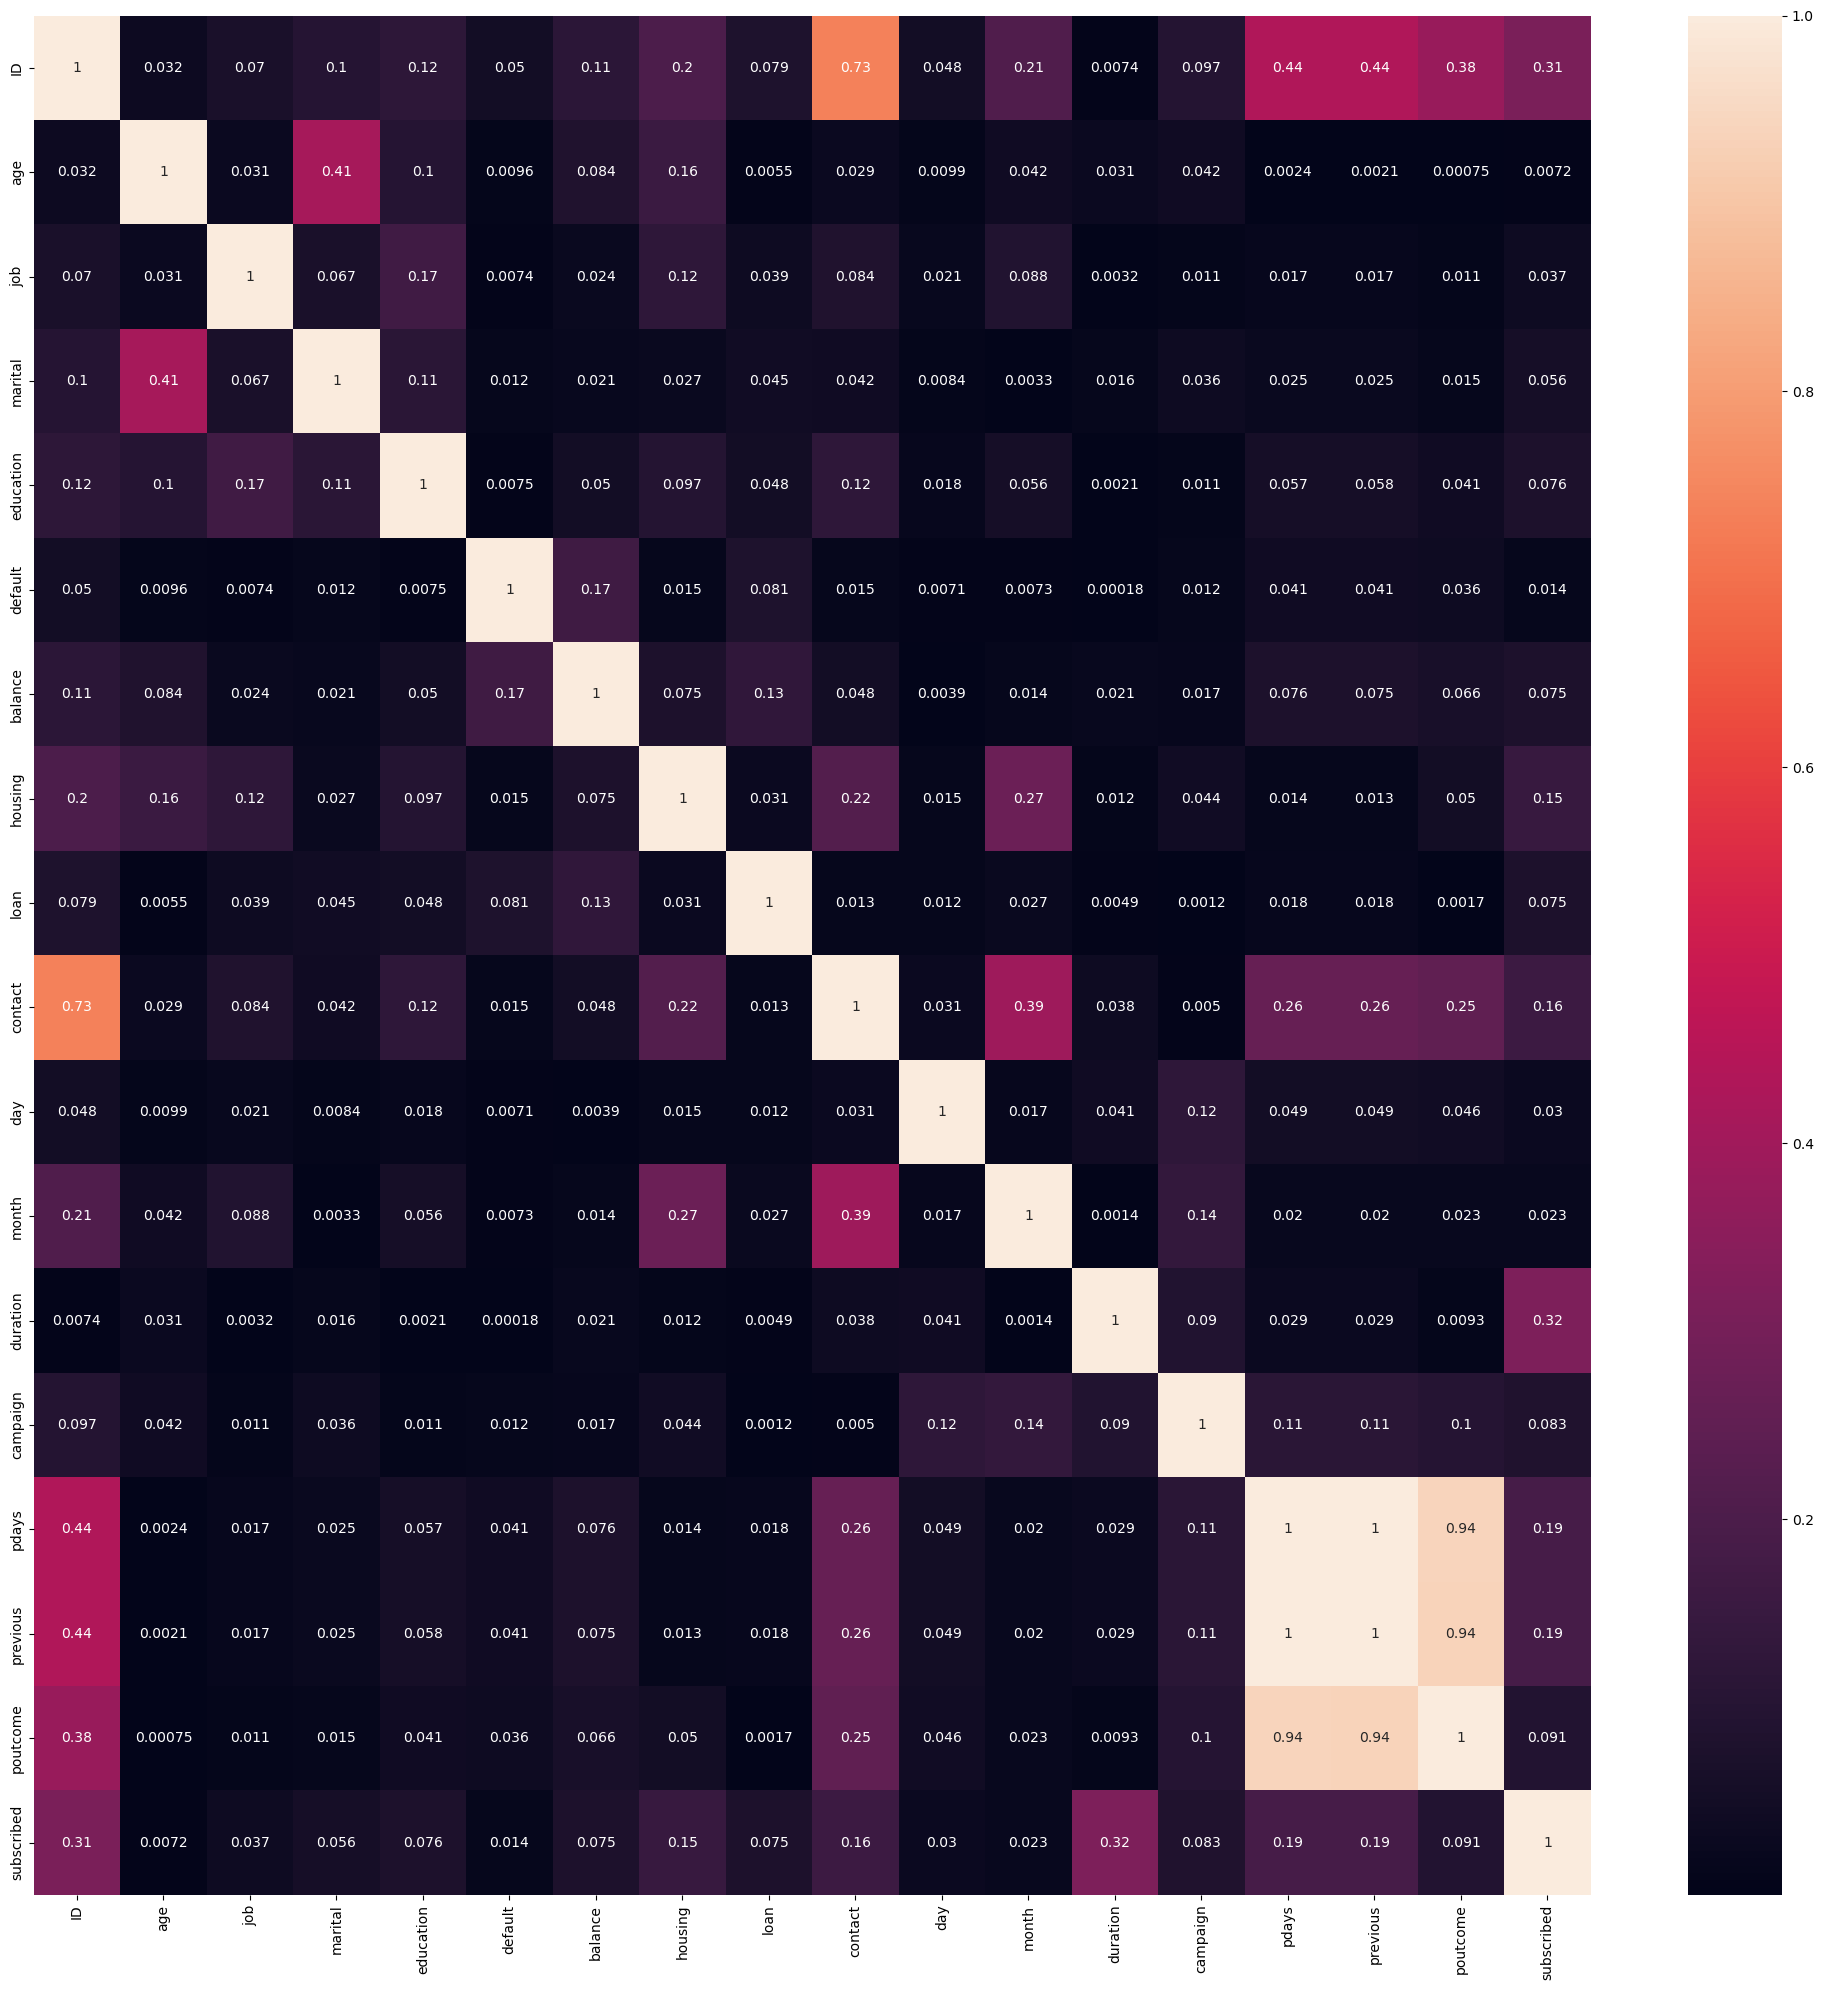

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

- since p days and previous are having 100% colinearity we can remove one
- since very less co lineariity we can also remove day,month,default and age

In [40]:
df=df.drop(columns=["pdays",'age','default','day','month'])

In [41]:
x = df.drop(columns='subscribed')
y=df['subscribed']

### Standerdization

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.34151241, -1.32170682, -0.27690613, ...,  0.17075027,
        -0.40284457,  0.37763179],
       [ 1.46195128,  2.02350436, -0.27690613, ...,  0.17075027,
        -0.40284457,  0.37763179],
       [-0.49420828,  0.80706393, -0.27690613, ..., -1.10491846,
        -0.40284457,  0.37763179],
       ...,
       [ 1.14493508, -0.10526639,  1.37408135, ...,  0.17075027,
        -0.40284457,  0.37763179],
       [ 1.43112488, -0.10526639, -1.92789361, ...,  0.17075027,
        -0.40284457,  0.37763179],
       [-0.15418847, -0.10526639,  1.37408135, ...,  0.79680156,
        -0.40284457,  0.37763179]])

### Resampling training data

In [43]:
y.value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

In [44]:
# using smote
from imblearn.over_sampling import SMOTE
ov_sm = SMOTE(sampling_strategy=0.75) # increasing data upto 75% 
x,y = ov_sm.fit_resample(x,y)
y.value_counts()

0    25264
1    18948
Name: subscribed, dtype: int64

### Train test Split

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [46]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [47]:
# finding best random state
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
74,189.0,82.215990,81.525378
67,181.0,82.173769,81.995838
6,22.0,82.152658,81.724419
77,199.0,82.110438,81.606804
61,168.0,82.110438,81.977744
...,...,...,...
2,4.0,68.316294,67.900118
66,180.0,68.304231,68.099159
8,28.0,68.283121,68.162490
52,150.0,68.258995,68.271058


- we can observe that Random state 2 we get max accuracy wit minimum difference

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=26)

### Training the model

Logistic regression 

In [49]:
# Training
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_test_pred=lr.predict(x_test)
print (accuracy_score(y_test,lr_test_pred))

0.8050303085135257


In [50]:
# Find best cv
from sklearn.model_selection import cross_val_score
lr_ac_score = accuracy_score(y_test,lr_test_pred)*100
for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x,y,cv=i)
    lr_cv_score_mean = lr_cv_score.mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score_mean*100,'\nAccuracy score',lr_ac_score,end = '\n\n')
    


cv =  2 
Cross Validation score =  80.83099610965348 
Accuracy score 80.50303085135258


cv =  3 
Cross Validation score =  80.31084322104937 
Accuracy score 80.50303085135258


cv =  4 
Cross Validation score =  80.86718537953497 
Accuracy score 80.50303085135258


cv =  5 
Cross Validation score =  80.34932763485816 
Accuracy score 80.50303085135258


cv =  6 
Cross Validation score =  79.05106871637585 
Accuracy score 80.50303085135258


cv =  7 
Cross Validation score =  80.17054193431647 
Accuracy score 80.50303085135258


cv =  8 
Cross Validation score =  80.66149298927432 
Accuracy score 80.50303085135258


cv =  9 
Cross Validation score =  80.78588936823937 
Accuracy score 80.50303085135258



- cv = 5 is giving best result

In [51]:
cv =5

In [52]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [53]:
lr_s_cv_score=cross_val_score(lr,x,y,cv=cv)
lr_s_cv_score_mean = lr_s_cv_score.mean()
print('\nCross Validation score = ',lr_s_cv_score_mean*100,'\nAccuracy score = ',lr_ac_score,'\nDifference = ',lr_ac_score-(lr_s_cv_score_mean*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score_mean*100,2),'Test accuracy':round(lr_ac_score,2),'Difference':round(np.abs(lr_ac_score-(lr_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  80.34932763485816 
Accuracy score =  80.50303085135258 
Difference =  0.15370321649442076


##### Random  forest classifer

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_test_pred=rfc.predict(x_test)
rfc_ac_score = accuracy_score(y_test,rfc_test_pred)*100
print (rfc_ac_score)

94.15543291414096


In [55]:
# cross validation
rfc_s_cv_score=cross_val_score(rfc,x,y,cv=cv)
rfc_s_cv_score_mean = rfc_s_cv_score.mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score,'\nDifference = ',(rfc_s_cv_score_mean*100)-rfc_ac_score)
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score,2),'Difference':round(np.abs(rfc_ac_score-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  92.79625760933592 
Accuracy score =  94.15543291414096 
Difference =  -1.359175304805035


##### AdaBoostClassifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_test_pred=abc.predict(x_test)
abc_ac_score = accuracy_score(y_test,abc_test_pred)*100
print (abc_ac_score)

90.37365421152627


In [57]:
# cross validation
abc_s_cv_score=cross_val_score(abc,x,y,cv=cv)
abc_s_cv_score_mean = abc_s_cv_score.mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score,'\nDifference = ',(abc_s_cv_score_mean*100)-abc_ac_score)
ms_df = ms_df.append({'Model':'Adaboost classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score,2),'Difference':round(np.abs(abc_ac_score-(abc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  89.33566045681198 
Accuracy score =  90.37365421152627 
Difference =  -1.037993754714293


##### GradientBoostingClassifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_test_pred=gbc.predict(x_test)
gbc_ac_score = accuracy_score(y_test,gbc_test_pred)*100
print (gbc_ac_score)

92.06550257848548


In [59]:
# cross validation
gbc_s_cv_score=cross_val_score(gbc,x,y,cv=cv)
gbc_s_cv_score_mean = gbc_s_cv_score.mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score,'\nDifference = ',(gbc_s_cv_score_mean*100)-gbc_ac_score)
ms_df = ms_df.append({'Model':'Gradient boosting classifier','CV score':round(gbc_s_cv_score_mean*100,2),'Test accuracy':round(gbc_ac_score,2),'Difference':round(np.abs(gbc_ac_score-(gbc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  90.62039775364067 
Accuracy score =  92.06550257848548 
Difference =  -1.4451048248448046


##### XGBClassifier

In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_test_pred=xgb.predict(x_test)
xgb_ac_score = accuracy_score(y_test,xgb_test_pred)*100
print (xgb_ac_score)

94.02877046955578


In [61]:
# cross validation
xgb_s_cv_score=cross_val_score(xgb,x,y,cv=cv)
xgb_s_cv_score_mean = xgb_s_cv_score.mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score,'\nDifference = ',(xgb_s_cv_score_mean*100)-xgb_ac_score)
ms_df = ms_df.append({'Model':'XGBOOST classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score,2),'Difference':round(np.abs(xgb_ac_score-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  92.0250560539823 
Accuracy score =  94.02877046955578 
Difference =  -2.0037144155734836


##### SVC

In [62]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_test_pred=svc.predict(x_test)
svc_ac_score = accuracy_score(y_test,svc_test_pred)*100
print (svc_ac_score)

73.11137247806026


In [63]:
# cross validation
svc_s_cv_score=cross_val_score(svc,x,y,cv=cv)
svc_s_cv_score_mean = svc_s_cv_score.mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score,'\nDifference = ',(svc_s_cv_score_mean*100)-svc_ac_score)
ms_df = ms_df.append({'Model':'SVC','CV score':round(svc_s_cv_score_mean*100,2),'Test accuracy':round(svc_ac_score,2),'Difference':round(np.abs(svc_ac_score-(svc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  73.04803646654399 
Accuracy score =  73.11137247806026 
Difference =  -0.06333601151627022


##### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_test_pred=svc.predict(x_test)
knn_ac_score = accuracy_score(y_test,svc_test_pred)*100
print (knn_ac_score)

73.11137247806026


In [65]:
# cross validation
knn_s_cv_score=cross_val_score(knn,x,y,cv=cv)
knn_s_cv_score_mean = knn_s_cv_score.mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score,'\nDifference = ',(knn_s_cv_score_mean*100)-knn_ac_score)
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score,2),'Difference':round(np.abs(knn_ac_score-(knn_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  82.79878530457026 
Accuracy score =  73.11137247806026 
Difference =  9.687412826509998


In [66]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
1,Random forest classifier,92.80,94.16,1.36
4,XGBOOST classifier,92.03,94.03,2.00
3,Gradient boosting classifier,90.62,92.07,1.45
2,Adaboost classifier,89.34,90.37,1.04
0,Logistic regression,80.35,80.50,0.15
5,SVC,73.05,73.11,0.06
6,KNN Classifier,82.80,73.11,9.69


- we can observe that Random Forest classifier is giving good accuracy with less over fitting

### Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [75,100,125], 
    'min_samples_split': [2,3, 5,], 
    'criterion' : ["gini", "entropy"]
    
}

In [68]:
# using grid search cv
gcv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=cv)
gcv.fit(x_train,y_train)

# Printing the best parameters
print("Best parameters:", gcv.best_params_)

Best parameters: {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 125}


# Training with best parms

In [69]:
final_model = RandomForestClassifier(criterion= 'entropy', min_samples_split= 2, n_estimators= 125)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

94.11019632678911


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6305
           1       0.92      0.95      0.93      4748

    accuracy                           0.94     11053
   macro avg       0.94      0.94      0.94     11053
weighted avg       0.94      0.94      0.94     11053



#### roc curve

In [71]:
fpr,tpr,threshold = roc_curve(y_test,final_model_test_pred)

In [72]:
print("fpr = ",fpr,'\ntpr = ',tpr,'\nthreshold = ',threshold)

fpr =  [0.         0.06217288 1.        ] 
tpr =  [0.         0.94545072 1.        ] 
threshold =  [2 1 0]


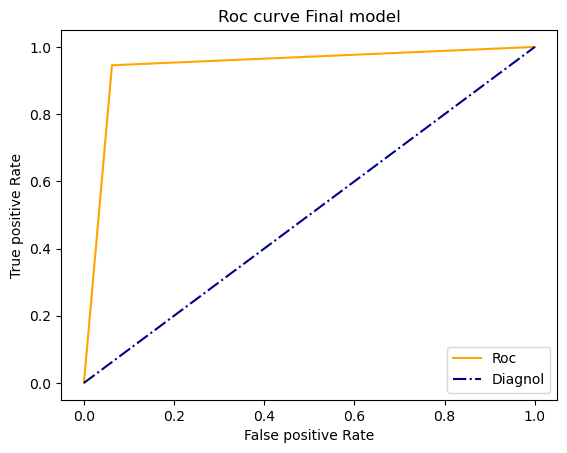

In [73]:
plt.plot(fpr,tpr,color='orange',label = 'Roc') # x axis , y axis ,clr, lable
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve Final model')
plt.legend()
plt.show()

In [74]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

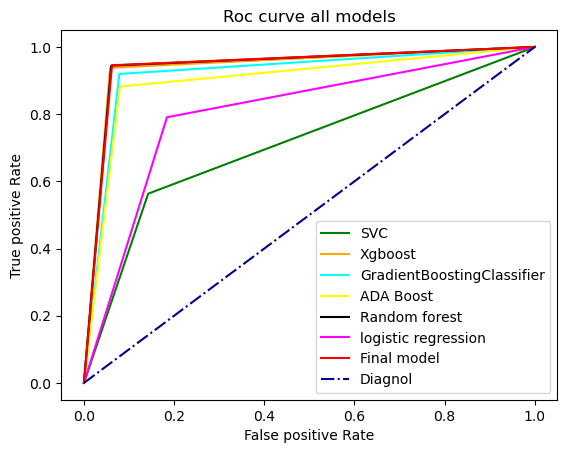

In [75]:
fpr1,tpr1,threshold = roc_curve(y_test,final_model_test_pred)
fpr2,tpr2,threshold = roc_curve(y_test,svc_test_pred)
fpr3,tpr3,threshold = roc_curve(y_test,xgb_test_pred)
fpr4,tpr4,threshold = roc_curve(y_test,gbc_test_pred)
fpr5,tpr5,threshold = roc_curve(y_test,abc_test_pred)
fpr6,tpr6,threshold = roc_curve(y_test,rfc_test_pred)
fpr7,tpr7,threshold = roc_curve(y_test,lr_test_pred)



plt.plot(fpr2,tpr2,color='green',label = 'SVC') # x axis , y axis ,clr, lable
plt.plot(fpr3,tpr3,color='orange',label = 'Xgboost')
plt.plot(fpr4,tpr4,color='cyan',label = 'GradientBoostingClassifier') 
plt.plot(fpr5,tpr5,color='yellow',label = 'ADA Boost') 
plt.plot(fpr6,tpr6,color='black',label = 'Random forest') 
plt.plot(fpr7,tpr7,color='magenta',label = 'logistic regression') 
plt.plot(fpr1,tpr1,color='red',label = 'Final model')
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve all models')
plt.legend()
plt.show()

### Saving Model

In [76]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

#### Predicting Test Dataset

In [77]:
test_df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Project\Third-Phase-Practice-Projects\BANK MARKETING\dataset5-main\termdeposit_test.csv")
train_df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Project\Third-Phase-Practice-Projects\BANK MARKETING\dataset5-main\termdeposit_train.csv")
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


#### Preprocessing

In [78]:
for column in test_df.columns:
    # Check if the column is of object type (categorical)
    if test_df[column].dtype == 'object':
        # Fit label encoder and transform the column
        labn.fit(train_df[column])
        test_df[column]=labn.transform(test_df[column])
        print(labn.classes_)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single']
['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['cellular' 'telephone' 'unknown']
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['failure' 'other' 'success' 'unknown']


In [79]:
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [80]:
test_df[skew] = pt.transform(test_df[skew])

In [81]:
test_df=test_df.drop(columns=["pdays",'age','default','day','month'])

In [82]:
test_x_scaled = scaler.transform(test_df)

In [83]:
pred_test_df = rfc.predict(test_x_scaled)

In [84]:
pred_test_df

array([0, 0, 0, ..., 0, 0, 0])

## The Values are predicted as required